raw:  (20, 1024, 204)


C:\Users\tiago.cunha\Anaconda3\envs\firefit\lib\site-packages\spectral\graphics\spypylab.py:27: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams['keymap.all_axes'] = ''


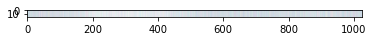

In [2]:
import numpy as np
from spectral import *
import pandas as pd 

cube = open_image("D:/HamInspectionGui/ML_Data/storage/2021_02_26_08_03_24.hdr")

raw = cube.load()

print("raw: ", raw.shape)
view = imshow(cube, (60, 30, 15))

In [3]:
# NORMALIZATION
def calculate_reflectance(raw, black, white):
    r = np.array(raw)
    b = np.array(black)
    w = np.array(white)
    print(r.shape)
    print(b.shape)
    print(w.shape)
    return (r-b)/(w-b)

data = calculate_reflectance(raw, dark, white)

(512, 512, 204)
(1, 512, 204)
(1, 512, 204)


C:\Users\tiago.cunha\Anaconda3\envs\firefit\lib\site-packages\spectral\graphics\spypylab.py:27: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams['keymap.all_axes'] = ''


(512, 512, 204)
(262144, 204)


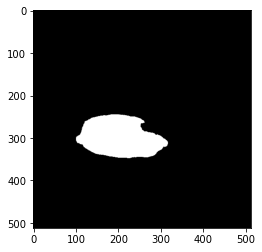

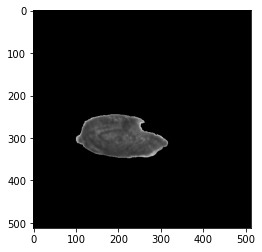

In [4]:
# SEGMENTATION
import numpy as np

# Organize data
def extract_pixels(data):
    d = data.reshape(-1,data.shape[2])
    print(d.shape)
    df = pd.DataFrame(data = d)
    df.columns = [f'band{i}' for i in range(1, 1+d.shape[1])]
    # save to csv
    df.to_csv("D:/data/10.csv")
    return df

def find_ham(data):
    # Mask
    d = np.array(data)
    low_ref= data[:,:,10]
    high_ref = data[:,:,150]
    m_ref = high_ref - low_ref
    mask = np.array(m_ref>0.3)
    res=imshow(mask)
    # Mask application
    for i in range(0,d.shape[2]):
         d[:,:,i] = d[:,:,i] * mask
    res1 = imshow(d[:,:,50])
    return d

ham_data = find_ham(data)

print(ham_data.shape)

ham_pixels = extract_pixels(ham_data)

In [5]:
ham_pixels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 204 entries, band1 to band204
dtypes: float32(204)
memory usage: 204.0 MB


In [6]:
ham_pixels.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Remove all null pixels

ham = ham_pixels[(ham_pixels.T != 0.0).any()]
ham.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204
125622,0.507246,0.488095,0.484848,0.456140,0.449612,0.429577,0.426752,0.418605,0.409574,0.404878,...,0.666667,0.666667,0.666667,0.666667,0.673913,0.697674,0.682927,0.666667,0.675676,0.722222
125623,0.507246,0.488095,0.464646,0.429825,0.421875,0.415493,0.414013,0.406977,0.409574,0.390244,...,0.631579,0.666667,0.627451,0.687500,0.608696,0.651163,0.658537,0.692308,0.648649,0.722222
125624,0.521739,0.476190,0.454545,0.429825,0.414062,0.415493,0.394904,0.383721,0.382979,0.380488,...,0.631579,0.648148,0.627451,0.666667,0.630435,0.651163,0.658537,0.666667,0.675676,0.666667
125625,0.492754,0.476190,0.464646,0.429825,0.414062,0.408451,0.401274,0.389535,0.382979,0.380488,...,0.614035,0.611111,0.627451,0.645833,0.630435,0.674419,0.634146,0.666667,0.648649,0.694444
125626,0.507246,0.476190,0.454545,0.421053,0.414062,0.394366,0.394904,0.389535,0.382979,0.375610,...,0.649123,0.611111,0.627451,0.645833,0.630435,0.651163,0.658537,0.641026,0.648649,0.722222


In [8]:
ham.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15665 entries, 125622 to 177892
Columns: 204 entries, band1 to band204
dtypes: float32(204)
memory usage: 12.3 MB


In [9]:
ham.to_csv("D:/data/10.csv")

In [11]:
mean = list(ham.mean())
print(len(mean))

204
